# Detecção de OutLiers

Recomendações

````
Livro Outliers in Statistical Data de Vic Barnett: esse é o livro clássico da área

Livro Outlier Analysis de Charu C. Aggarwal: apresenta vários métodos para análise de outliers


Além disso, na documentaçâo de "pyOD" há referÊncias à artigos que descrevem sobre detecção de Outliers
````

### O que é Outliers

Valores anormais ou fora do padrão (muito afasstados da média)

### Causas do Outilers

+ Acasos
+ Erros no preenchimento dos dados
+ Fraudes

### Tratamento para os outliers

+ remover registro (as vezes nâo é recomendado pois perde informação)
+ não fazer nada
+ substituir o valor com a média

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "../files/"

## Detecção de OutLiers apartir do gráfico BoxPlots

lnik: https://www.escolaedti.com.br/o-que-e-um-box-plot

### O que é o BoxPlot

O Box Plot (também chamado de box e whisker plot) é um método alternativo ao histograma e ao ramo-e-folha para representar os dados.

O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes).

Embora o Boxplot forneça informação sobre localização e dispersão, seu verdadeiro valor está na informação que fornece sobre a cauda da distribuição.

Pontos desgarrados (Outliers) podem afetar de forma adversa as decisões a serem tomadas a partir da análise dos dados se não forem devidamente considerados.

### Como fazê-lo

Em um boxplot são apresentados 5 estatísticas: o mínimo, o primeiro quartil (Q1), a mediana, o terceiro quartil (Q3) e o máximo. Esse valores também são chamados de resumo dos cinco números.

Para construir um desenha-se um retângulo alinhado verticalmente (ou horizontalmente) com duas semirretas, uma em cada um dos lados opostos do retângulo.

A altura do retângulo é definida pelos quartis Q1 e Q3. Uma linha secciona o retângulo no valor da mediana (ou Q2). As semirretas ligam respectivamente os quartis Q1 e Q3 ao valor mínimo e ao máximo do conjunto de dados.

### Como interpretar o `BoxPlot`

O grande objetivo é verificar a distribuição dos dados. Assim, as conclusões que tiramos ao analisar um box plot são: centro dos dados (a média ou mediana), a amplitude dos dados (máximo – mínimo), a simetria ou assimetria do conjunto de dados e a presença de outliers.

Vamos detalhar essas interpretações:

linha do meio == `mediana`
+ O centro da distribuição é indicado pela linha da mediana, no centro do quadrado.

intervalo do boxplot == `dispersão`
+ A dispersão é representada pela amplitude do gráfico, que pode ser calculada como máximo valor – mínimo valor. Quanto maior for a amplitude, maior a variação nos dados.

Retângulo Central == `50% dos dados`
+ O retângulo contém 50% dos valores do conjunto de dados. A posição da linha mediana no retângulo informa sobre a assimetria da distribuição.

Pontos fora do invervalo == `outliers`
+ Os outliers em um box plot aparecem como pontos ou asteriscos fora das “linhas” desenhadas. 

4 Quarties == `25% dos dados cada`
+ Como cada um é 50% dos dados, então, o retângulo (que tem 2 deles) tem 50% dos dados

Como seria uma distribuição simétrica
+ Uma distribuição simétrica teria a mediana no centro do retângulo. Se a mediana é próxima de Q1, então, os dados são positivamente assimétricos. Se a mediana é próxima de Q3 os dados são negativamente assimétricos. No exemplo que você pode observar, a seguir, a distribuição dos dados é simétrica.

In [7]:
base = pd.read_csv(file_path + 'credit_data.csv')
base = base.dropna()
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


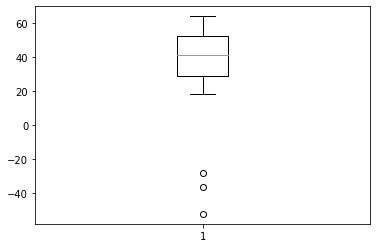

In [10]:
# outliers idade
plt.boxplot(base.iloc[:,2], showfliers = True)

Observando o gráfico `boxPLot` percebemos que os Outilers são abaixo de 20.

Encontramos 3 outliers abaixo de 20

In [ ]:
outliers_age = base[(base.age < -20)]

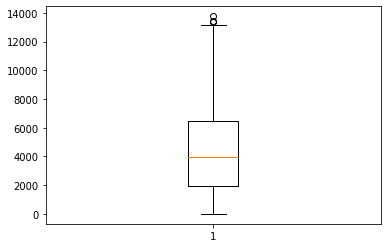

In [11]:
# outliers loan
plt.boxplot(base.iloc[:,3])
outliers_loan = base[(base.loan > 13400)]

## Detecção por gráfico de Dispersão

In [31]:
base = pd.read_csv(file_path + 'credit_data.csv')
base = base.dropna()
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


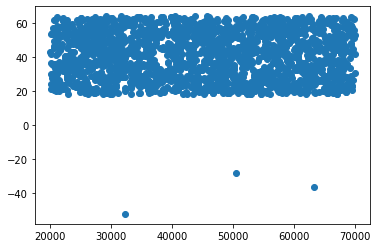

In [32]:
# income x age
plt.scatter(base.iloc[:,1], base.iloc[:,2])

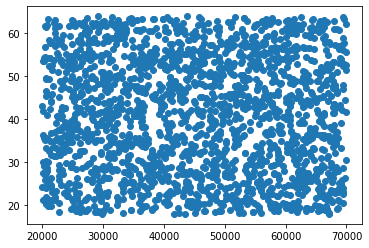

In [33]:
# Corrigindo outliers encontrados em "age"
base.loc[base.age < 0, 'age'] = 40.92
plt.scatter(base.iloc[:,1], base.iloc[:,2])

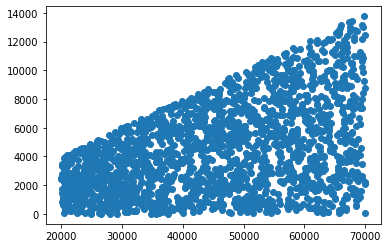

In [34]:
# income x loan
plt.scatter(base.iloc[:,1], base.iloc[:,3])

### Disperção na base `census`

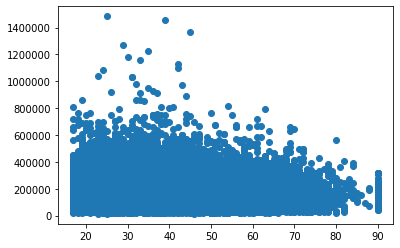

In [18]:
base_census = pd.read_csv(file_path + 'census.csv')

# age x final weight
plt.scatter(base_census.iloc[:, 0], base_census.iloc[:,2])

Perceba que há registros bem altos, que, dependendo do contexto, pode ser um outliers ou algo interresasnte como uma fraude

## Detectar OutLiers com lib especifica para dectetá-los `pyOD`

OD = OutLiers Detections

Muitas vezes, para bases muito grande, é complicado fazer a detecção de Outliers

Docs
+ https://github.com/yzhao062/pyod
+ https://pyod.readthedocs.io/en/latest/

Web Articles:
+ https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/
+ https://towardsdatascience.com/anomaly-detection-with-pyod-b523fc47db9
+ https://www.kdnuggets.com/2019/06/overview-outlier-detection-methods-pyod.html


In [21]:
base = pd.read_csv(file_path + 'credit_data.csv')
base = base.dropna()
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [23]:
from pyod.models.knn import KNN
detector = KNN()
detector.fit(base.iloc[:,1:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [24]:
previsoes = detector.labels_
previsoes # Temos todos os registros,
# Se valor é 0, etnâo nâo é outlier
# Se valor é 1, então É OUTLIERS

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes
# Quanto mairo  valor, maior é a chnace de ser Outliers

array([ 704.78948078,  365.218309  ,  583.2159934 , ...,  395.01466508,
        557.88978241, 1071.5109404 ])

Vou pegar somente os outliers

In [26]:
outliers = []
for i in range(len(previsoes)):
    #print(previsoes[i])
    if previsoes[i] == 1:
        outliers.append(i)

In [30]:
# Vou buscar as linhas com outiliers
lista_outliers = base.iloc[outliers, :] 
len(lista_outliers)

200

In [36]:
lista_outliers.head()

,i#clientid,income,age,loan,c#default
4,5,66952.688845,18.584336,8770.099235,1
24,25,65301.984029,48.840922,5465.267886,0
29,30,58842.891308,54.510948,10871.186790,0
34,35,57584.973790,36.672021,1728.423755,0
38,39,60921.063104,18.840526,968.836383,0
